In [1]:
from pathlib import Path

from gemdat import SitesData, Trajectory, plots
from gemdat.io import load_known_material

/home/vikko/local_projects/GEMDAT/.venv/lib/python3.11/site-packages/MDAnalysis/topology/TPRParser.py:161: DeprecationWarning: 'xdrlib' is deprecated and slated for removal in Python 3.13
  import xdrlib


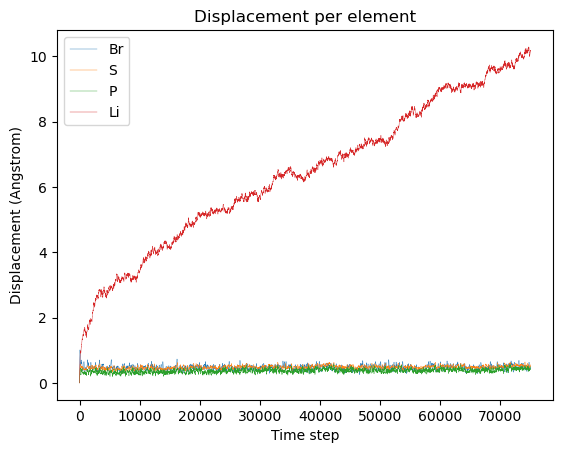

In [2]:
trajectory = Trajectory.from_vasprun(Path('../../example/vasprun.xml'))

plots.displacement_per_element(trajectory=trajectory);

In [3]:
# Create a new trajectory object that only consists of Lithium
diff_trajectory = trajectory.filter('Li')

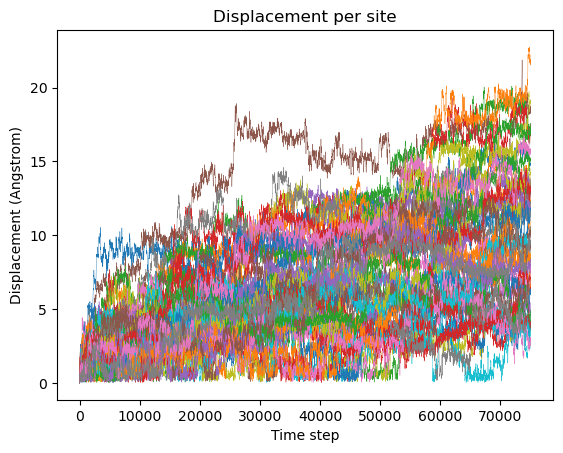

In [4]:
plots.displacement_per_site(trajectory=diff_trajectory);

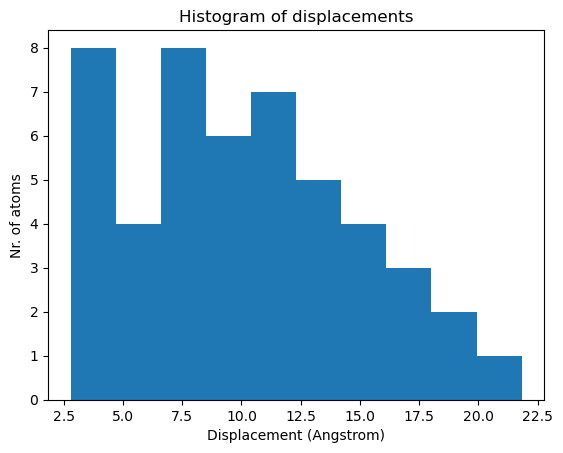

In [5]:
plots.displacement_histogram(trajectory=diff_trajectory);

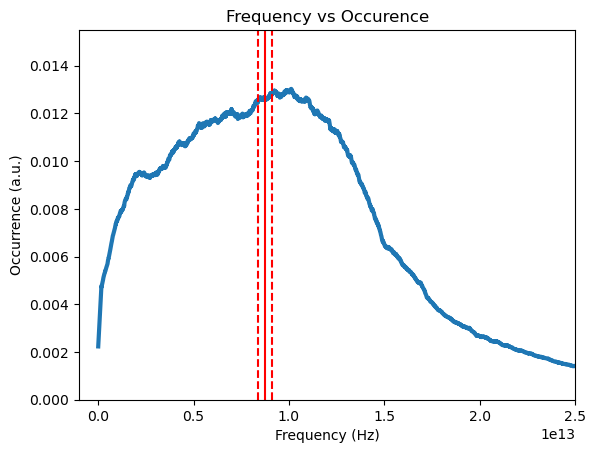

In [6]:
plots.frequency_vs_occurence(trajectory=diff_trajectory);

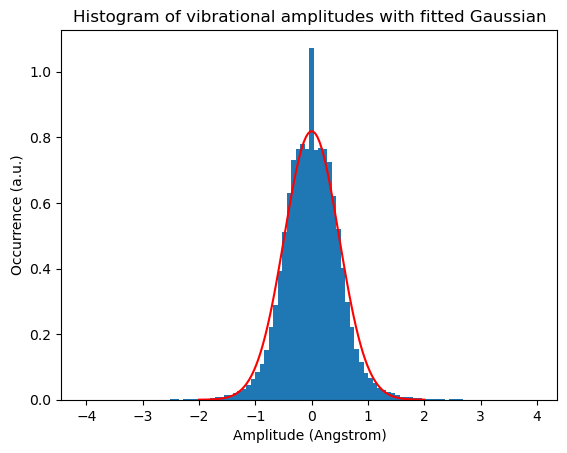

In [7]:
plots.vibrational_amplitudes(trajectory=diff_trajectory);

In [8]:
# Further analysis can be done by loading a known material and creating sites from it for the simulation data:
# There are multiple possibilities here, like loading a CIF file, but this example keeps it simple
structure = load_known_material('argyrodite', supercell=(2, 1, 1))
print("\n".join(
    structure.__repr__().split('\n')[:20]))  # only print the first 20 lines

Structure Summary
Lattice
    abc : 19.848 9.924 9.924
 angles : 90.0 90.0 90.0
 volume : 1954.7456820479997
      A : 19.848 0.0 1.2153394834738332e-15
      B : 1.5959009175390938e-15 9.924 6.076697417369166e-16
      C : 0.0 0.0 9.924
    pbc : True True True
PeriodicSite: 48h (Li) (1.816, 1.816, 0.2382) [0.0915, 0.183, 0.024]
PeriodicSite: 48h (Li) (11.74, 1.816, 0.2382) [0.5915, 0.183, 0.024]
PeriodicSite: 48h (Li) (1.816, 6.778, 5.2) [0.0915, 0.683, 0.524]
PeriodicSite: 48h (Li) (11.74, 6.778, 5.2) [0.5915, 0.683, 0.524]
PeriodicSite: 48h (Li) (6.778, 1.816, 5.2) [0.3415, 0.183, 0.524]
PeriodicSite: 48h (Li) (16.7, 1.816, 5.2) [0.8415, 0.183, 0.524]
PeriodicSite: 48h (Li) (6.778, 6.778, 0.2382) [0.3415, 0.683, 0.024]
PeriodicSite: 48h (Li) (16.7, 6.778, 0.2382) [0.8415, 0.683, 0.024]
PeriodicSite: 48h (Li) (9.686, 1.816, 8.108) [0.488, 0.183, 0.817]
PeriodicSite: 48h (Li) (19.61, 1.816, 8.108) [0.988, 0.183, 0.817]
PeriodicSite: 48h (Li) (9.686, 6.778, 3.146) [0.488, 0.683, 0.317

In [9]:
# sites can be generated from the structure,
# There are multiple possibilities here, like genererating a sites from the density of the diffusing element
# In the trajectory data, but this example keeps it simple and uses the just defined structure

sites = SitesData(
    structure=structure,
    trajectory=trajectory,
    floating_specie='Li',
)

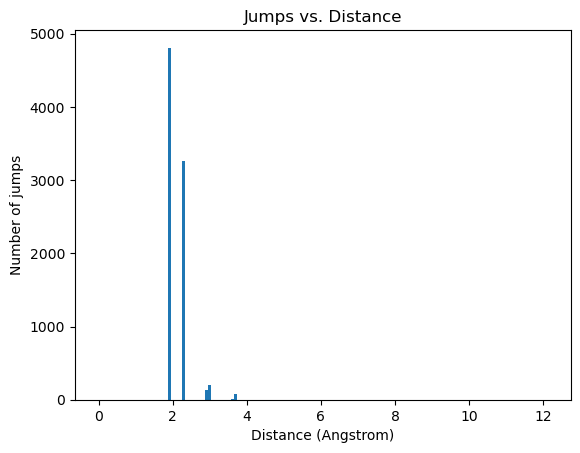

In [10]:
plots.jumps_vs_distance(sites=sites);

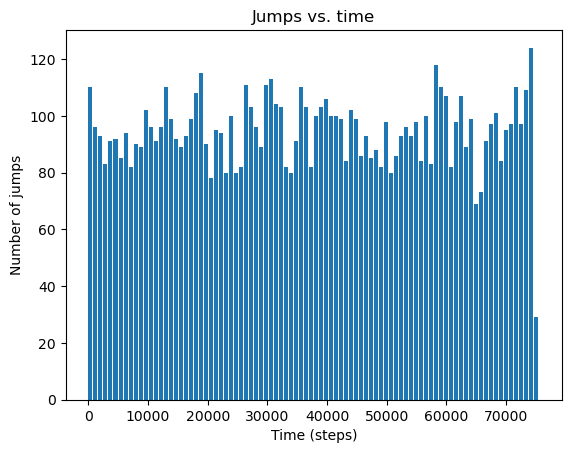

In [11]:
plots.jumps_vs_time(sites=sites, binsize=840);

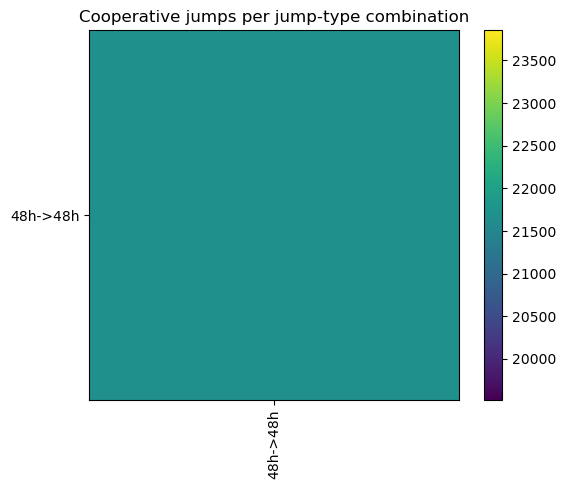

In [12]:
plots.collective_jumps(sites=sites);

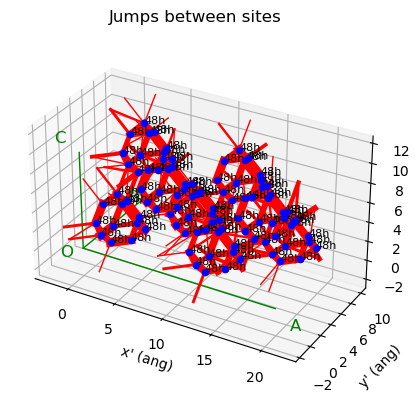

In [13]:
plots.jumps_3d(sites=sites);